<a href="https://colab.research.google.com/github/mw1849/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm 

In [2]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**STEP 1: IMPORT DATASETS**

In [3]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
opendata = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')


**STEP 2: FILTER FOR 9/30/2019 ENTRIES ONLY**

In [0]:
opendata.columns = [column.replace(' ', '_').lower() for column in opendata.columns]

In [0]:
opendata_subset = opendata[opendata.report_date == '09/30/2019']

In [0]:
opendata_subset = opendata_subset.drop_duplicates()

**STEP 3: CREATE NEW COLUMN OF OVERALL COUNTS**

In [0]:
opendata_subset = opendata_subset.fillna(0)

In [0]:
opendata_subset['shelter_count'] = opendata_subset['adult_family_comm_hotel'] + opendata_subset['adult_family_shelter'] + opendata_subset['adult_shelter'] + opendata_subset['adult_shelter_comm_hotel'] + opendata_subset['fwc_cluster'] + opendata_subset['fwc_comm_hotel'] + opendata_subset['fwc_shelter']

In [10]:
opendata_subset.head()

,report_date,borough,community_district,adult_family_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,shelter_count
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


In [0]:
opendata_subset = opendata_subset[['community_district', 'shelter_count']]

In [14]:
opendata_subset.tail()

,community_district,shelter_count
671,410,7.0
672,412,22.0
673,413,9.0
674,414,3.0
675,501,1.0


**STEP 4: FILTER FOR "HOMELESS PERSON ASSISTANCE" COMPLAINT TYPE**

In [0]:
df_hpa = df[df.complaint_type == 'Homeless Person Assistance']

In [17]:
df_hpa.tail()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2704450,2842611,2842799,43602217,08/21/2019 10:06:46 AM,08/21/2019 12:24:23 PM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10305,1361 HYLAN BOULEVARD,HYLAN BOULEVARD,DAWSON PLACE,DUMONT AVENUE,DAWSON PLACE,DUMONT AVENUE,NaN,STATEN ISLAND,HYLAN BOULEVARD,NaN,Closed,NaN,The mobile outreach response team offered serv...,08/21/2019 12:24:23 PM,02 STATEN ISLAND,5.033230e+09,STATEN ISLAND,960353.0,156243.0,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.595495,-74.086049,"(40.595494954391306, -74.0860485129795)",502.0
2707639,2845919,2846107,43600526,08/21/2019 08:10:38 PM,08/21/2019 09:31:52 PM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10306,FINLEY AVENUE,FINLEY AVENUE,FINLEY AVENUE,NEW DORP LANE,FINLEY AVENUE,NEW DORP LANE,NaN,NaN,NaN,NaN,Closed,NaN,The mobile outreach response team went to the ...,08/21/2019 09:31:52 PM,02 STATEN ISLAND,NaN,STATEN ISLAND,956036.0,145642.0,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.566385,-74.101549,"(40.566384633382405, -74.10154893713703)",502.0
2708589,2846898,2847086,43600519,08/22/2019 12:14:28 AM,08/22/2019 03:13:01 AM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10308,NAHANT STREET,NAHANT STREET,CORBIN AVENUE,NAHANT STREET,CORBIN AVENUE,NAHANT STREET,NaN,NaN,NaN,NaN,Closed,NaN,The mobile outreach response team went to the ...,08/22/2019 03:13:01 AM,03 STATEN ISLAND,NaN,STATEN ISLAND,943778.0,143230.0,MOBILE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.559717,-74.145654,"(40.55971669097485, -74.1456539081716)",503.0
2709322,2847656,2847844,43616779,08/22/2019 08:39:46 AM,08/22/2019 09:57:39 AM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10314,661 GANNON AVENUE SOUTH,GANNON AVENUE SOUTH,WOOLLEY AVENUE,WOODWARD AVENUE,WOOLLEY AVENUE,WOODWARD AVENUE,NaN,STATEN ISLAND,SOUTH GANNON AVENUE,NaN,Closed,NaN,The mobile outreach response team offered serv...,08/22/2019 09:57:39 AM,02 STATEN ISLAND,NaN,STATEN ISLAND,944796.0,160540.0,MOBILE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.607234,-74.142091,"(40.60723373235313, -74.14209130506785)",502.0
2715851,2854543,2854732,43624539,08/23/2019 11:35:57 AM,08/23/2019 12:27:23 PM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10310,501 FOREST AVENUE,FOREST AVENUE,BARD AVENUE,NORTH MADA AVENUE,BARD AVENUE,NORTH MADA AVENUE,NaN,STATEN ISLAND,FOREST AVENUE,NaN,Closed,NaN,The mobile outreach response team offered serv...,08/23/2019 12:27:23 PM,01 STATEN ISLAND,5.001470e+09,STATEN ISLAND,954758.0,169030.0,MOBILE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630576,-74.106251,"(40.63057575477373, -74.10625086522197)",501.0


**STEP 5: GROUP SUBSET BY COUNT OF "HOMELESS PERSON ASSISTANCE" REQUESTS PER COMMUNITY DISTRICT**

In [0]:
df_hpa = df_hpa.groupby('borocd').size().reset_index(name='count_of_311_requests')

In [19]:
df_hpa.tail()


,borocd,count_of_311_requests
54,413.0,39
55,414.0,53
56,501.0,41
57,502.0,34
58,503.0,18


**STEP 6: MERGE DATA**



In [0]:
merged_data = pd.merge(left=df_hpa, right=opendata_subset, left_on='borocd', right_on='community_district')

In [0]:
merged_data = merged_data.fillna(0)

In [22]:
merged_data.tail()

,borocd,count_of_311_requests,community_district,shelter_count
47,410.0,40,410,7.0
48,412.0,152,412,22.0
49,413.0,39,413,9.0
50,414.0,53,414,3.0
51,501.0,41,501,1.0


**STEP 7: SCATTERPLOT**

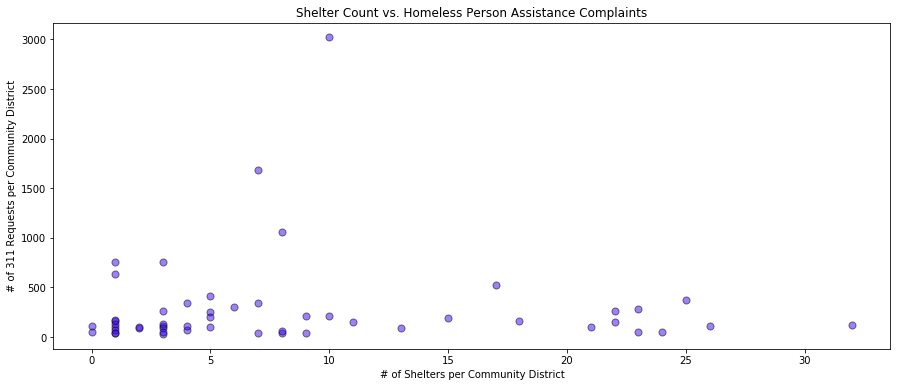

In [23]:
y = np.array(merged_data.count_of_311_requests)
x = np.array(merged_data.shelter_count)

color = '#3d03fc'
area = 50 

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('Shelter Count vs. Homeless Person Assistance Complaints')
plt.ylabel('# of 311 Requests per Community District')
plt.xlabel('# of Shelters per Community District')

plt.show()

At first glance at the scatterplot, there does not seem to be a strong correlation between the number of shelters and count of 311 homeless service requests. 

**STEP 8: FIND THE CORRELATION COEFFICIENT**

In [24]:
np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

**STEP 9: LINEAR REGRESSION**

In [26]:
y = np.array(merged_data.count_of_311_requests)
x = np.array(merged_data.shelter_count)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1.  1.]
 [ 1. 17.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  6.]
 [ 1. 23.]
 [ 1. 25.]
 [ 1.  3.]
 [ 1. 15.]
 [ 1.  8.]
 [ 1. 23.]
 [ 1. 32.]
 [ 1. 21.]
 [ 1. 26.]
 [ 1. 13.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 22.]
 [ 1. 10.]
 [ 1. 18.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  7.]
 [ 1. 22.]
 [ 1.  9.]
 [ 1.  3.]
 [ 1.  1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.003052
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.956
Time:                        00:

**STEP 10: LINEAR REGRESSION SCATTERPLOT**

In [27]:
p = model.params
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [291.97710496  -0.44923816]
R2: 6.103776725696619e-05


In [28]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.45x + 291.98; R2 = 0.0


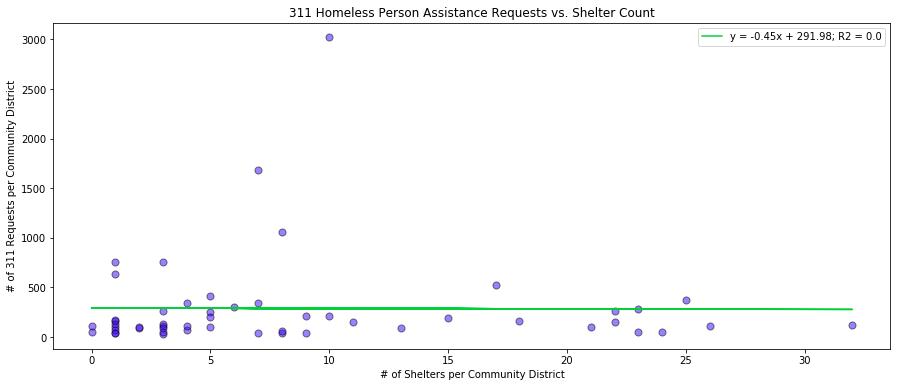

In [30]:
x_dummy = np.array(merged_data.shelter_count)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.shelter_count), 
    np.array(merged_data.count_of_311_requests), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.title('311 Homeless Person Assistance Requests vs. Shelter Count')
plt.xlabel('# of Shelters per Community District')
plt.ylabel('# of 311 Requests per Community District')
plt.legend()

plt.show()

Based on the results of the linear regression, there is not a significant relationship between the count of total shelter buildings and the count of homeless requests per community district, as the p-value for the relationship is 0.956 -- it is not even significant at the alpha = 0.05 level. The coefficient of -0.45 for the shelter counts indicates that for every shelter per community district, there will be a 0.45 decrease in homeless person assistance complaints per community district. The lack of a significant (but slightly negative) relationship can be seen by the line of best fit on the scatterplot, which decreases slightly but is pretty much flat. 